# **Proyecto final**

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Jueves 18 de enero, 9:59pm. **NO HABRÁN PRÓRROGAS**
- Grupos de dos personas por elección libre
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom

El propósito de este proyecto es que tengan un código de su autoría publicado en GitHub

## Página web

> Según lo discutido en la última clase, **deberán crear su propia página web usando GitHub Pages**. En ella, deberán mostrar el notebook de su proyecto final

Recursos adicionales:

1. Videos tutoriales
    - https://www.youtube.com/watch?v=zyGfECfJ9BY
    - https://www.youtube.com/watch?v=K5xImVmm2Ds


2. Plantillas
    - https://bootstrapmade.com/bootstrap-portfolio-templates/
    - https://cssauthor.com/free-bootstrap-portfolio-templates/

Incluya aquí el link de sus páginas web
- Integrante 1: Elías Gómez
- Integrante 2: Gustavo Torres

Página web: https://qlab-intro-python.github.io/proyecto-final-gustavo_elias_trabajo_final/

## Aplicación

Pautas generales

- Insumos: deberán trabajar al menos dos (2) bases de datos diferentes que requieran alguna transformación (`data wrangling`). Una de ellas tiene que ser un archivo de texto (`.txt`, `.pdf`, `.docx`, etc)
- Tareas: (i) explicar la relevancia del análisis a desarrollar; (ii) utilizar al menos una vez listas, loops y functions para transformar la base de datos cruda y obtener información relevanete; y (iii) aplicar algoritmos de NLP para transformar texto en datos valiosos
- Deberán proveer obligatoriamente gráficos (2 o más) y tablas/cuadros (2 o más) de su libre elección y conclusiones relevantes

Posibles datos para el ejercicio de `data wrangling`

- Estadísticas de 100 años del BCRP. Más [aquí](https://www.bcrp.gob.pe/en/estadisticas/estadisticas-de-100-anos-del-bcrp.html)
- 1,000 años de datos macroeconómicos en Reino Unido. Más [aquí](https://www.kaggle.com/datasets/bank-of-england/a-millennium-of-macroeconomic-data)
- Historial crediticio - Datathon Interbank 2020. Más [aquí](https://www.kaggle.com/competitions/interbank20/data?select=censo_test.csv)
- Ataques terroristas en el mundo. Más [aquí](https://www.kaggle.com/code/gpreda/global-terrorist-attacks/input)
- [World Hapiness Report 2023](https://worldhappiness.report/), compilado por Carla Solís. Más [aquí](https://raw.githubusercontent.com/ccsuehara/python_para_las_ccss/main/Clase%205/data/world-happiness-report-2023.csv)
- Otros datos del BCRP, MEF, SBS, SMV, BVL, INEI, etc.
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos


Posibles datos para el ejercicio de NLP

- Federal Open Market Committee (FOMC) meetings statements. Más [aquí](https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm). El repo incluye tres archivos `.docx`
- Programa Monetario del Banco Central de Reserva del Perú (BCRP). Más [aquí](https://www.bcrp.gob.pe/transparencia/actividades-oficiales/notas-informativas.html). El repo incluye tres archivos `.pdf`
- Mensajes presidenciales de Carla Solís y Luis Eduardo San Martín. [Acá](https://github.com/ccsuehara/Peruvian-presidents-speeches/tree/master/data/presidentialSpeechPeru/txt) los archivos
- "Fake vs real news" de George McIntire. Más info [aquí](https://opendatascience.com/how-to-build-a-fake-news-classification-model/). La base de datos está alojada en su [repo](https://github.com/GeorgeMcIntire/fake_real_news_dataset?tab=readme-ov-file)
- Coronavirus tweets de Kaggle. Más info [aquí](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification)
- Twitter Financial News de Kaggle. Más infor [aquí](https://www.kaggle.com/datasets/sulphatet/twitter-financial-news)
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos

In [6]:
import requests
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from matplotlib.dates import YearLocator

In [17]:
url_base  = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
cod_var   = 'PM05563BA' 
form_out  = '/json'
period    = '/1950/2021'
url_final = url_base+cod_var+form_out+period

TI_BCRP=requests.get(url_final)
data_ti = TI_BCRP.json()
PBI_BCRP=requests.get('https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PM05373BA/json/1950/2021')
data_pbi=PBI_BCRP.json()

data_pbi

{'config': {'title': 'Producto bruto interno (millones US$)',
  'series': [{'name': 'Producto bruto interno (millones US$) - PBI (millones US$)',
    'dec': '0'}]},
 'periods': [{'name': '1950', 'values': ['1025.39826329939']},
  {'name': '1951', 'values': ['1349.66168031385']},
  {'name': '1952', 'values': ['1375.81191120557']},
  {'name': '1953', 'values': ['1408.42760271324']},
  {'name': '1954', 'values': ['1427.73958106334']},
  {'name': '1955', 'values': ['1589.49164971336']},
  {'name': '1956', 'values': ['1816.15320842349']},
  {'name': '1957', 'values': ['1929.51153911906']},
  {'name': '1958', 'values': ['1771.77018863724']},
  {'name': '1959', 'values': ['1788.03197074855']},
  {'name': '1960', 'values': ['2225.27091700128']},
  {'name': '1961', 'values': ['2498.51257018546']},
  {'name': '1962', 'values': ['2909.80375573211']},
  {'name': '1963', 'values': ['3140.39018682858']},
  {'name': '1964', 'values': ['3752.17957092345']},
  {'name': '1965', 'values': ['4468.20633724

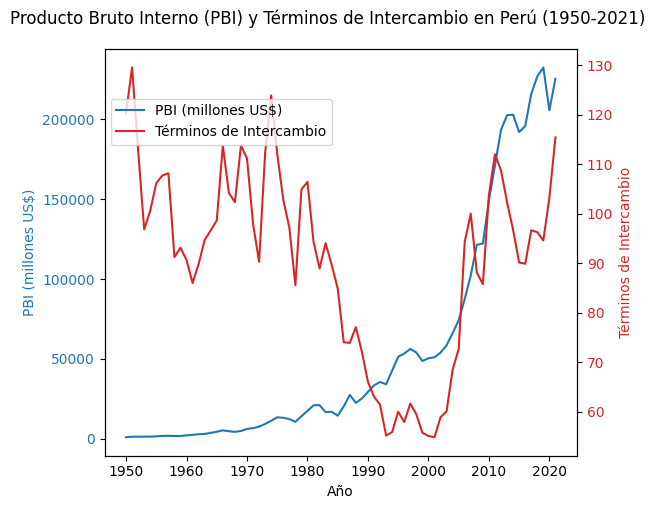

In [20]:
# Crear DataFrames a partir de los datos
df_pbi = pd.DataFrame(data_pbi['periods'])
df_pbi['value'] = [float(value[0].replace(',', '')) for value in df_pbi['values']]
df_pbi['date'] = pd.to_datetime(df_pbi['name'])

df_ti = pd.DataFrame(data_ti['periods'])
df_ti['value'] = [float(value[0].replace(',', '')) for value in df_ti['values']]
df_ti['date'] = pd.to_datetime(df_ti['name'])

# Crear gráfica con dos ejes
fig, ax1 = plt.subplots()

# PBI en el eje y1
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('PBI (millones US$)', color=color)
ax1.plot(df_pbi['date'], df_pbi['value'], label='PBI (millones US$)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Términos de intercambio en el eje y2
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Términos de Intercambio', color=color)
ax2.plot(df_ti['date'], df_ti['value'], label='Términos de Intercambio', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Añadir título y leyenda
fig.tight_layout()
fig.suptitle('Producto Bruto Interno (PBI) y Términos de Intercambio en Perú (1950-2021)', y=1.05)
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.88))

# Mostrar gráfica
plt.show()